# A simple harmonic oscillator

This demo implements a simple harmonic oscillator
in a 2D neural population.
The oscillator is more visually interesting on its own
than the integrator, but the principle at work is the same.
Here, instead of having the recurrent input just integrate
(i.e. feeding the full input value back to the population),
we have two dimensions which interact.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import nengo
from nengo.processes import Piecewise

## Step 1: Create the Model

The model consists of a single neural ensemble that we will call `Neurons`.

In [2]:
# Create the model object
model = nengo.Network(label='Oscillator')
with model:
    # Create the ensemble for the oscillator
    neurons = nengo.Ensemble(200, dimensions=2)

## Step 2: Provide Input to the Model

A brief input signal is provided
to trigger the oscillatory behavior of the neural representation.

In [3]:
with model:
    # Create an input signal
    input = nengo.Node(Piecewise({0: [1, 0], 0.1: [0, 0]}))

    # Connect the input signal to the neural ensemble
    nengo.Connection(input, neurons)

    # Create the feedback connection
    nengo.Connection(neurons, neurons,
                     transform=[[1, 1], [-1, 1]],
                     synapse=0.1)

## Step 3: Add Probes

These probes will collect data from the input signal and the neural ensemble.

In [4]:
with model:
    input_probe = nengo.Probe(input, 'output')
    neuron_probe = nengo.Probe(neurons, 'decoded_output', synapse=0.1)

## Step 4: Run the Model

In [5]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

## Step 5: Plot the Results

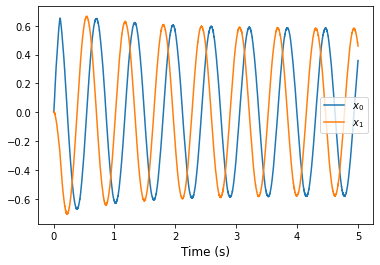

In [6]:
plt.figure()
plt.plot(sim.trange(), sim.data[neuron_probe])
plt.xlabel('Time (s)', fontsize='large')
plt.legend(['$x_0$', '$x_1$']);

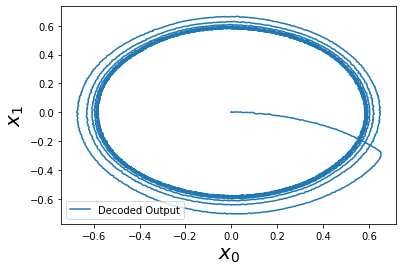

In [7]:
data = sim.data[neuron_probe]
plt.figure()
plt.plot(data[:, 0], data[:, 1], label='Decoded Output')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20)
plt.legend();